# 数据准备

In [2]:
# 下载supervise-to-darknet的转换脚本
!git clone https://github.com/SuyueLiu/supervisely-to-darknet.git

Cloning into 'supervisely-to-darknet'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [2]:
cd supervisely-to-darknet/

/Users/aaron/Desktop/code/dissertation-diary/supervisely-to-darknet


In [2]:
# 查看总的数据集
import os
data_path = './org-hands'
datasets = sorted(os.listdir(data_path))[1:]
print(datasets)

['P01_02', 'P01_03', 'P01_06', 'P02_06', 'P02_08', 'P02_11', 'P03_06', 'P03_07', 'P03_11', 'P03_18', 'P03_27', 'P04_21', 'P05_04', 'P05_05', 'P06_01', 'P06_02', 'P06_03', 'P06_08', 'P07_02', 'P07_08', 'P07_11', 'P08_02', 'P08_03', 'P08_07', 'P08_12', 'P08_19', 'P10_01', 'P12_05', 'P12_06', 'P13_06', 'P14_01', 'P14_02', 'P14_03', 'P15_01', 'P15_11', 'P16_02', 'P16_03', 'P17_01', 'P19_03', 'P20_03', 'P21_04', 'P22_09', 'P23_01']


In [3]:
os.makedirs('ego-hands', exist_ok=True)

In [4]:
# get the images that contains objects in each data subset

from super2darknet import *
convertor = Convertor()
total = 0
for dataset in datasets:
    img_num = convertor.get_num_of_data(os.path.join(data_path, dataset))  # the number of images with objects
    total += img_num
    print(f"{dataset}: ", img_num)
print('total number: ', total)

 25%|██▍       | 242/985 [00:00<00:00, 2405.93it/s]

P01_02:  976
P01_03:  139


 10%|▉         | 200/2070 [00:00<00:00, 1991.14it/s]

P01_06:  969


  0%|          | 0/219 [00:00<?, ?it/s]

P02_06:  806
P02_08:  84
P02_11:  89


  0%|          | 0/195 [00:00<?, ?it/s]

P03_06:  175
P03_07:  160
P03_11:  76
P03_18:  27


  0%|          | 0/777 [00:00<?, ?it/s]

P03_27:  151
P04_21:  334


  0%|          | 0/1371 [00:00<?, ?it/s]

P05_04:  250
P05_05:  109
P06_01:  159
P06_02:  24


  0%|          | 0/346 [00:00<?, ?it/s]

P06_03:  1214
P06_08:  28
P07_02:  163


  0%|          | 0/215 [00:00<?, ?it/s]

P07_08:  259
P07_11:  407


  0%|          | 0/275 [00:00<?, ?it/s]

P08_02:  184
P08_03:  263
P08_07:  32
P08_12:  44


 11%|█         | 198/1824 [00:00<00:00, 1979.67it/s]

P08_19:  224


  0%|          | 0/223 [00:00<?, ?it/s]

P10_01:  1356
P12_05:  112
P12_06:  288


  0%|          | 0/55 [00:00<?, ?it/s]

P13_06:  190
P14_01:  149
P14_02:  41
P14_03:  26
P15_01:  93


 42%|████▏     | 177/426 [00:00<00:00, 1761.82it/s]

P15_11:  55
P16_02:  96


  0%|          | 0/273 [00:00<?, ?it/s]

P16_03:  414
P17_01:  256


  0%|          | 0/1138 [00:00<?, ?it/s]

P19_03:  269
P20_03:  382


 27%|██▋       | 228/853 [00:00<00:00, 2274.27it/s]

P21_04:  978


100%|██████████| 184/184 [00:00<00:00, 2424.21it/s]

P22_09:  648
P23_01:  147
total number:  12846


## 划分数据集
* 在NG的Machine Learning中有提到，对于小数据集，建议train:val:test = 6:2:2.
* 对于ego-hands这个数据集，P表示不同的拍摄者，在划分数据集的时候有两个方案：
    1. 打乱所有拍摄者的数据，按比例随机抽取；
    2. 按P来划分，例如P01-P08做为训练集，P12-P17做为验证集，其余的为测试集。
* 来说第二种划分方法更好一点，因为打乱所有的照片，在测试的时候可能会遇到和训练集中同属于一个拍摄这的照片。而对于第二种的话，测试集则为完全不同的拍摄这，这对于评估模型的能力更为客观。

reference: https://arxiv.org/abs/1905.00742

根据比例，将P01 ~ P08划为训练集，P10, P12 ~ P16划为验证集，P19， P19 ～ P23划分为测试集

In [24]:
# split training set
for dataset in datasets[0:26]:
    org_dir = os.path.join(data_path, dataset)
    convertor.convert(org_dir, './ego-hands', mode='train')


# split val set
for dataset in datasets[26: 26+11]:
    org_dir = os.path.join(data_path, dataset)
    convertor.convert(org_dir, './ego-hands', mode='val')

# add files
classes, _ = convertor.get_classes(org_dir)
convertor.add_extra_files('./ego-hands', classes)

moving images: 100%|██████████| 414/414 [00:01<00:00, 282.13it/s]


In [25]:
# split test set, stored in the directory ./ego-hands_test/iamges/val
for dataset in datasets[37:]:
    org_dir = os.path.join(data_path, dataset)
    convertor.convert(org_dir, './ego-hands_test', mode='val')
    
# add files
classes, _ = convertor.get_classes(org_dir)
convertor.make_dirs('./ego-hands_test', 'train') # since there is only val dir
convertor.add_extra_files('./ego-hands_test', classes)

moving images: 100%|██████████| 147/147 [00:00<00:00, 375.21it/s]


## 验证转换后的标签
根据图片尺寸调整转换后的边界框（中心坐标和宽高），然后在原图上画出来看是否符合原始标记。

Image: './ego-hands/images/train/P01_02_0000000181.jpg'


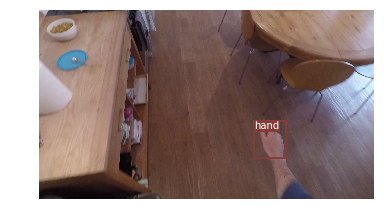

In [4]:
%matplotlib inline
from verify_labels import verify_boxes
img_path = './ego-hands/images/train/P01_02_0000000181.jpg'
label_path = './ego-hands/labels/train/P01_02_0000000181.txt'
meta_path = './org-hands/P01_02'
verify_boxes(img_path, label_path, meta_path)

* 可以看出转换后的边界框坐标通过调整尺寸之后正确的贴合手部区域，证明label的转换是正确的。